In [2]:
from nnfs.datasets import spiral_data
import numpy as np
import matplotlib.pyplot as plt
import nnfs

In [3]:
nnfs.init()

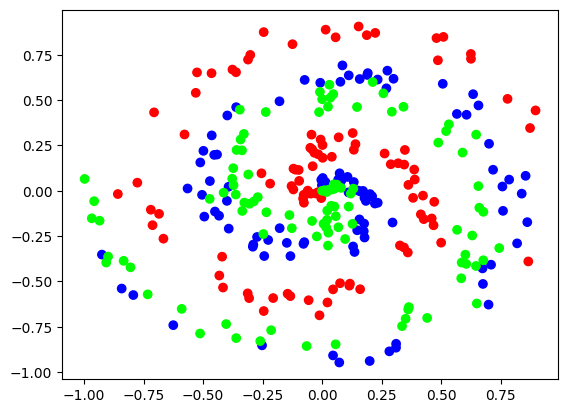

In [5]:
X,y=spiral_data(samples=100,classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

### Dense Layer Class

weights=0.01*np.random.rand(n_inputs,n_neurons) "/n"
Usually we take (n_neurons,n_inputs) but to avoid Transpose operations we have created weights matrix like this (n_inputs,n_neurons).


In [8]:
class Dense_Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.01*np.random.rand(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))
    
    def forward_pass(self,inputs):
        self.layer_output=np.dot(inputs,self.weights)+self.biases

In [9]:
X,y=spiral_data(samples=100,classes=3)

dense1=Dense_Layer(2,3)

dense1.forward_pass(X)

dense1.layer_output[:5]



array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.42244891e-05,  1.61732787e-05,  1.03030925e-05],
       [ 3.82975777e-05, -2.85163478e-05, -6.19247658e-06],
       [ 2.02595620e-04,  2.07231860e-04,  9.45250285e-05],
       [ 1.65634629e-04,  4.95431814e-05,  3.46673405e-05]], dtype=float32)

ReLu activation function is f(x)=max(0,x)

In [13]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [15]:
class ReLu:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

### Applying ReLu activation on  dense layer

In [17]:
X,y=spiral_data(samples=100,classes=3)

dense1=Dense_Layer(2,3)

activation1=ReLu()

dense1.forward_pass(X)

activation1.forward(dense1.layer_output)

activation1.output[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.7207138e-05, 0.0000000e+00, 3.4893459e-05],
       [9.6777745e-05, 1.6916043e-04, 1.2684471e-04],
       [1.4141564e-04, 2.2867673e-04, 1.9291500e-04],
       [1.8997790e-04, 3.1186308e-04, 2.5725819e-04]], dtype=float32)

softmax is f(x)=e^xi/sum(e^xi)

In [24]:
inputs = [[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]]

In [ ]:
exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
exp_values

array([[0.13533528, 0.36787944, 1.        , 0.60653066],
       [0.04978707, 1.        , 0.00247875, 0.04978707],
       [0.00822975, 0.54881164, 1.        , 0.01657268]])

In [26]:
probablities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
probablities

array([[0.06414769, 0.17437149, 0.47399085, 0.28748998],
       [0.04517666, 0.90739747, 0.00224921, 0.04517666],
       [0.00522984, 0.34875873, 0.63547983, 0.0105316 ]])

In [27]:
class softmax:
    def forward(self,input):
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        probablities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probablities
        
    

### Applying Both ReLu and Softmax

In [ ]:
X,y=spiral_data(samples=100,classes=3)

dense1=Dense_Layer(2,3)

activation1=ReLu()

dense2=Dense_Layer(3,3)

activation2=softmax()

dense1.forward_pass(X)

activation1.forward(dense1.layer_output)

dense2.forward_pass(activation1.output)

activation2.forward(dense2.layer_output)

print(activation2.output[:5])



[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]
